Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 


Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [1]:
# importing the module which is required to read the file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Automobile_insurance_fraud.csv') # Reading the file

In [3]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
data.shape

(1000, 40)

In [6]:
data['policy_bind_date'].value_counts()

01-01-2006    3
28-04-1992    3
05-08-1992    3
25-09-2001    2
16-05-2008    2
             ..
20-12-1990    1
02-10-2003    1
19-07-2006    1
30-06-2002    1
03-06-2014    1
Name: policy_bind_date, Length: 951, dtype: int64

In [7]:
data['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [8]:
data['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [9]:
data['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [10]:
data['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [11]:
data['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [12]:
data['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [13]:
data['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [14]:
data['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
30-01-2015    21
13-01-2015    21
12-02-2015    20
22-02-2015    20
06-02-2015    20
31-01-2015    20
01-01-2015    19
23-02-2015    19
14-01-2015    19
21-01-2015    19
21-02-2015    19
12-01-2015    19
20-01-2015    18
18-01-2015    18
14-02-2015    18
03-01-2015    18
01-02-2015    18
28-02-2015    18
25-02-2015    18
09-01-2015    17
24-02-2015    17
08-02-2015    17
06-01-2015    17
26-02-2015    17
16-01-2015    16
15-02-2015    16
13-02-2015    16
05-02-2015    16
16-02-2015    16
15-01-2015    15
28-01-2015    15
17-01-2015    15
18-02-2015    15
22-01-2015    14
27-02-2015    14
20-02-2015    14
27-01-2015    13
23-01-2015    13
09-02-2015    13
03-02-2015    13
01-03-2015    12
04-01-2015    12
26-01-2015    11
02-01-2015    11
29-01-2015    11
11-02-2015    10
07-02-2015    10
19-02-2015    10
10-02-2015    10
25-01-2015    10
11-01-2015    

In [15]:
data['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [16]:
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [17]:
data['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [18]:
data['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [19]:
data['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [20]:
data['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [21]:
data['incident_location'].value_counts()

5333 MLK Lane          1
5608 Solo St           1
7570 Cherokee Drive    1
1358 Maple St          1
2849 Pine Drive        1
                      ..
7041 Tree Ridge        1
4618 Flute Ave         1
9730 2nd Hwy           1
4862 Lincoln Hwy       1
5771 Sky Ave           1
Name: incident_location, Length: 1000, dtype: int64

In [22]:
data['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [23]:
data['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [24]:
data['auto_make'].value_counts()

Suburu        80
Saab          80
Dodge         80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [25]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

'collision_type';'property_damage'; 'police_report_available' have '?'

In [26]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [27]:
data.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


In [28]:
# Checking the covriance
data.cov()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.325104e+04,970.201810,1.703130e+06,1.888144e+03,1.410315e+02,4.098745e+06,1.476998e+05,2.053193e+04,6.537987e+04,56.525149,1.728322,-0.959327,7.468871,1.887564e+05,3.670575e+04,1.940521e+04,1.326454e+05,-0.202464,NaN
age,9.702018e+02,83.544841,1.395997e+05,1.632352e+02,3.214568e+01,3.806326e+05,1.678029e+04,-1.802445e+03,1.892620e+03,5.538026,0.205834,-0.117534,0.531856,1.685908e+04,3.369297e+03,2.685543e+03,1.080424e+04,0.074430,NaN
policy_number,1.703130e+06,139599.665361,6.608139e+10,-1.059731e+06,1.416366e+06,5.296036e+09,1.305565e+08,7.023384e+07,-4.095652e+07,201.322010,3518.009337,-961.035852,-3617.161738,-1.222275e+08,-1.099333e+07,-1.324355e+07,-9.799063e+07,-282.988733,NaN
policy_deductable,1.888144e+03,163.235235,-1.059731e+06,3.743784e+05,-4.848613e+02,1.527928e+07,1.993895e+05,6.005009e+05,-4.048617e+05,259.175175,31.927928,-11.423423,45.313313,3.689501e+05,1.167917e+05,1.912697e+05,6.088869e+04,96.088088,NaN
policy_annual_premium,1.410315e+02,32.145675,1.416366e+06,-4.848613e+02,5.961772e+04,-3.504155e+06,5.664307e+05,-9.349637e+04,1.615803e+05,-2.678940,-11.441581,5.362622,0.632688,5.862176e+04,-2.101409e+04,-1.372875e+04,9.336460e+04,-72.306760,NaN
umbrella_limit,4.098745e+06,380632.632633,5.296036e+09,1.527928e+07,-3.504155e+06,5.278077e+12,3.240420e+09,-3.026763e+09,-1.553189e+09,-371415.415415,-49788.788789,42850.850851,-17204.204204,-2.447073e+09,-5.092246e+08,-2.637003e+08,-1.674148e+09,136733.733734,NaN
insured_zip,1.476998e+05,16780.292669,1.305565e+08,1.993895e+05,5.664307e+05,3.240420e+09,5.141121e+09,1.259612e+07,9.948976e+07,4124.025754,2005.227796,1687.420324,1578.175520,-6.412337e+07,-6.122698e+06,-2.366451e+06,-5.563422e+07,-14120.443708,NaN
capital-gains,2.053193e+04,-1802.445245,7.023384e+07,6.005009e+05,-9.349637e+04,-3.026763e+09,1.259612e+07,7.768588e+08,-3.674132e+07,-3178.586987,1750.552653,1276.184985,-546.757457,1.175952e+07,3.528093e+06,-1.047625e+05,8.336193e+06,5264.676376,NaN
capital-loss,6.537987e+04,1892.620220,-4.095652e+07,-4.048617e+05,1.615803e+05,-1.553189e+09,9.948976e+07,-3.674132e+07,7.898403e+08,-4894.551752,-426.512212,-562.812412,-1290.858959,-2.675643e+07,-6.318256e+06,-3.100158e+06,-1.733802e+07,-9571.920821,NaN
incident_hour_of_the_day,5.652515e+01,5.538026,2.013220e+02,2.591752e+02,-2.678940e+00,-3.714154e+05,4.124026e+03,-3.178587e+03,-4.894552e+03,48.321586,0.855540,-0.197045,0.050422,3.995424e+04,5.624392e+03,6.021358e+03,2.830849e+04,0.893562,NaN


#### Data Cleaning

In [29]:
#Lets replace '?' 
data = data.replace('?',np.NaN)

In [30]:
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [31]:
data['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [32]:
data['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [33]:
data['collision_type'].fillna(data['collision_type'].mode()[0], inplace = True)

In [34]:
data['property_damage'].fillna('NO', inplace = True)

In [35]:
data['police_report_available'].fillna('NO', inplace = True)

In [36]:
data['collision_type'].isnull().sum()

0

In [37]:
data['property_damage'].isnull().sum()

0

In [38]:
data['police_report_available'].isnull().sum()

0

#### Data Visualizations

<AxesSubplot:xlabel='total_claim_amount', ylabel='policy_annual_premium'>

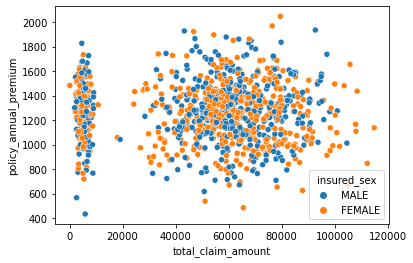

In [39]:
sns.scatterplot(x='total_claim_amount',y='policy_annual_premium',data=data, hue='insured_sex')

<AxesSubplot:xlabel='property_damage', ylabel='count'>

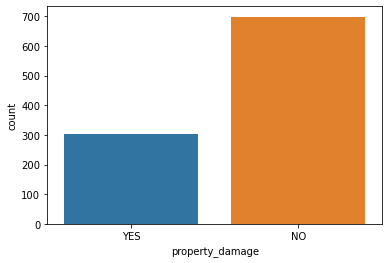

In [40]:
sns.countplot(x='property_damage',data=data)

<AxesSubplot:xlabel='vehicle_claim', ylabel='incident_type'>

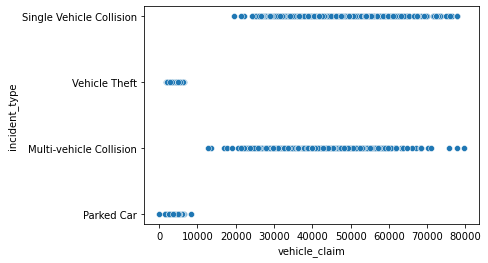

In [41]:
sns.scatterplot(x='vehicle_claim',y='incident_type',data= data)

<AxesSubplot:xlabel='incident_city', ylabel='incident_type'>

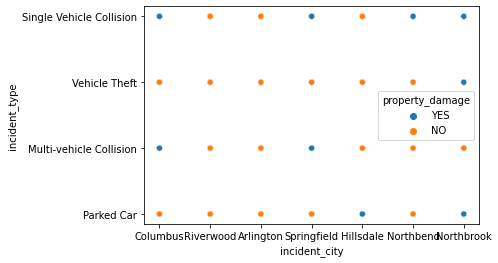

In [42]:
sns.scatterplot(x='incident_city',y='incident_type',data= data, hue = 'property_damage')

<AxesSubplot:xlabel='vehicle_claim', ylabel='incident_type'>

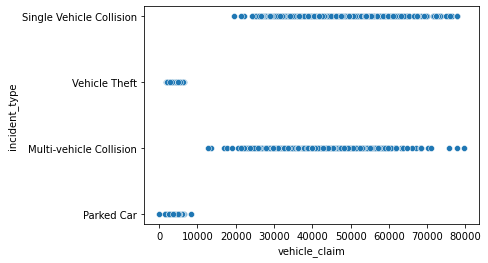

In [43]:
sns.scatterplot(x='vehicle_claim',y='incident_type',data= data)

<AxesSubplot:xlabel='vehicle_claim', ylabel='incident_type'>

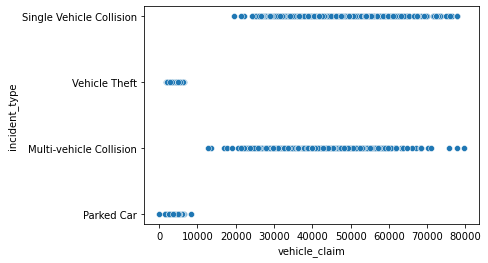

In [44]:
sns.scatterplot(x='vehicle_claim',y='incident_type',data= data)

In [45]:
# let's extrat days, month and year from policy bind date

data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], errors = 'coerce')

In [46]:
data['policy_bind_date']

0     2014-10-17
1     2006-06-27
2     2000-06-09
3     1990-05-25
4     2014-06-06
         ...    
995   1991-07-16
996   2014-05-01
997   2003-02-17
998   2011-11-18
999   1996-11-11
Name: policy_bind_date, Length: 1000, dtype: datetime64[ns]

In [47]:
# encodinng fraud report 

data['fraud_reported'] = data['fraud_reported'].replace(('Y','N'),(0,1))



In [48]:
# let's check the correlation of authorities_contacted with the target

data[['auto_model','fraud_reported']].groupby(['auto_model'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_model,fraud_reported
0,3 Series,0.944444
31,RSX,0.916667
25,Malibu,0.900000
36,Wrangler,0.880952
29,Pathfinder,0.870968
35,Ultima,0.869565
9,Camry,0.857143
11,Corolla,0.850000
8,CRV,0.850000
21,Legacy,0.843750


In [49]:
# encoding  auto make

data['auto_make'] = data['auto_make'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
                'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E4000',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahaoe','C300','ML350','Silverado','X6'),
                (0.95,0.91, 0.90,0.88,0.87,0.86,0.855,0.85,0.85,0.84,0.83,0.81,0.80,0.80,0.78,0.77,0.76,0.75,0.74,
                 0.73,0.72,0.72,0.71,0.71,0.71,0.71,0.70,0.70,0.69,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.60,0.59,0.56))


In [50]:
# let's check the correlation auto make with the target

data[['auto_make','fraud_reported']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_make,fraud_reported
7,Jeep,0.835821
9,Nissan,0.820513
12,Toyota,0.814286
0,Accura,0.808824
10,Saab,0.775000
11,Suburu,0.762500
4,Dodge,0.750000
6,Honda,0.745455
3,Chevrolet,0.723684
2,BMW,0.722222


In [51]:
# encoding auto make

data['auto_make'] = data['auto_make'].replace(('Jeep','Nissan','Toyota','Accura','Saab','Suburu',
                                'Dodge','Honda','Chevrolet','BMW','Volkswagen','Audi','Ford','Mercedes'),
                                              (0.84,0.82,0.81,0.80,0.77,0.76,0.75,0.74,0.73,0.72,0.71,0.69,0.69,0.66))


In [52]:
# let's check the correlation of authorities_contacted with the target

data[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,police_report_available,fraud_reported
1,YES,0.770701
0,NO,0.744898


In [53]:
# encoding property damage

data['police_report_available'] = data['police_report_available'].replace(('NO','YES'),(0.77,0.74))


In [54]:
# let's check the correlation of authorities_contacted with the target

data[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,property_damage,fraud_reported
0,NO,0.757880
1,YES,0.741722


In [55]:
#  encoding  property damage

data['property_damage'] = data['property_damage'].replace(('NO','YES'),(0.76,0.74))



In [56]:
# let's check the correlation of authorities_contacted with the target

data[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_city,fraud_reported
4,Northbrook,0.778689
5,Riverwood,0.776119
3,Northbend,0.765517
6,Springfield,0.757962
2,Hillsdale,0.751773
1,Columbus,0.738255
0,Arlington,0.710526


In [57]:
# encoding  incident city

data['incident_city'] = data['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.78,0.77,0.76,0.75,0.74,0.73,0.71))


In [58]:
# let's check the correlation of authorities_contacted with the target

data[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_state,fraud_reported
6,WV,0.820276
1,NY,0.778626
5,VA,0.772727
3,PA,0.733333
4,SC,0.705645
0,NC,0.690909
2,OH,0.565217


In [59]:
#  encoding incident state

data['incident_state'] = data['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.82,0.77,0.76,0.73,0.70,0.69,0.56))


In [60]:
# let's check the correlation of authorities_contacted with the target

data[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,authorities_contacted,fraud_reported
2,None,0.934066
4,Police,0.791096
1,Fire,0.730942
0,Ambulance,0.709184
3,Other,0.681818


In [61]:
#  encoding authorities contacted

data['authorities_contacted'] = data['authorities_contacted'].replace(('None','Police','Fire','Ambulance','Other'),
                                                                      (0.94,0.79,0.73,0.70,0.68))


In [62]:
# let's check the correlation of incident_severity with the target

data[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_severity,fraud_reported
3,Trivial Damage,0.933333
1,Minor Damage,0.892655
2,Total Loss,0.871429
0,Major Damage,0.394928


In [63]:
# encoding incident severity

data['incident_severity'] = data['incident_severity'].replace(('Trivial Damage','Minor Damage','Total Loss',
                                                              'Major Damage'),(0.94,0.89,0.87,0.39))


In [64]:
# let's check the correlation of collision_type with the target

data[['collision_type','fraud_reported']].groupby(['collision_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,collision_type,fraud_reported
1,Rear Collision,0.772340
2,Side Collision,0.746377
0,Front Collision,0.724409


In [65]:
# encoding collision type

data['collision_type'] = data['collision_type'].replace(('Rear Collision', 'Side Collision', 'Front Collision'),
                                                        (0.78,0.74,0.72))



In [66]:
# let's check the correlation of incident_type with the target

data[['incident_type','fraud_reported']].groupby(['incident_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_type,fraud_reported
3,Vehicle Theft,0.914894
1,Parked Car,0.904762
0,Multi-vehicle Collision,0.727924
2,Single Vehicle Collision,0.709677


In [67]:
# encoing for incident type

data['incident_type'] = data['incident_type'].replace(('Vehicle Theft','Parked Car','Multi-vehicle Collision',
                                'Single Vehicle Collision'),(0.91, 0.90, 0.72,0.70))



In [68]:
data['incident_date'] = pd.to_datetime(data['incident_date'], errors = 'coerce')

# extracting days and month from date
data['incident_month'] = data['incident_date'].dt.month
data['incident_day'] = data['incident_date'].dt.day

In [69]:
# let's know the relation between insured_relationship and fraud reported

data[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_relationship,fraud_reported
0,husband,0.794118
3,own-child,0.786885
4,unmarried,0.758865
1,not-in-family,0.741379
5,wife,0.729032
2,other-relative,0.706215


In [70]:
# encoding for insured relationship

data['insured_relationship'] = data['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0.79,0.78,0.75,0.74,0.72,0.70))



In [71]:
# let's know the relation between insured_hobbies and fraud reported

data[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_hobbies,fraud_reported
4,camping,0.909091
11,kayaking,0.907407
9,golf,0.890909
7,dancing,0.883721
3,bungie-jumping,0.839286
12,movies,0.836364
1,basketball,0.823529
8,exercise,0.807018
17,sleeping,0.804878
18,video-games,0.800000


In [72]:
# encoding for insured_hobbies

data['insured_hobbies'] = data['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.91, 0.90,
                0.89, 0.88,0.84,0.83,0.82,0.81,0.805,0.80,0.78,0.77,0.76,0.73,0.73,0.72,0.70,0.69,0.25,0.17))


In [73]:
# let's know the relation between insured_occupation and fraud reported

data[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_occupation,fraud_reported
7,other-service,0.830986
8,priv-house-serv,0.830986
0,adm-clerical,0.830769
5,handlers-cleaners,0.796296
9,prof-specialty,0.788235
10,protective-serv,0.777778
6,machine-op-inspct,0.763441
1,armed-forces,0.753623
11,sales,0.723684
12,tech-support,0.717949


In [74]:
#  encoding for insured_occupation

data['insured_occupation'] = data['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.84, 0.84,0.83, 0.79,0.78,0.77,0.76,0.75,0.72,0.71,
                                                          0.705,0.70,0.69,0.63))


In [75]:
# let's know the relation of insured_education_level with faud_reported

data[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_education_level,fraud_reported
5,Masters,0.776224
2,High School,0.775000
0,Associate,0.765517
3,JD,0.739130
1,College,0.737705
4,MD,0.736111
6,PhD,0.736000


In [76]:
#  encoding

data['insured_education_level'] = data['insured_education_level'].replace(('Masters', 'High School','Associate',
                                        'JD','College', 'MD','PhD'),(0.78,0.77,0.76,0.74,0.73,0.72,0.71))
#data['insured_education_level'].value_counts()

In [77]:
# lets know the relation of insured sex and fraud reported

data[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,insured_sex,fraud_reported
0,FEMALE,0.765363
1,MALE,0.738661


In [78]:
#  encoding for sex

data['insured_sex'] = data['insured_sex'].replace(('FEMALE','MALE'),(0.76,0.73))
#data['insured_sex'].value_counts()# target encoding for sex

data['insured_sex'] = data['insured_sex'].replace(('FEMALE','MALE'),(0.76,0.73))


In [79]:
# lets know the relation of policy state and fraud reported

data[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_csl,fraud_reported
2,500/1000,0.783333
0,100/300,0.742120
1,250/500,0.737892


In [80]:
# encoding for policy_csl

data['policy_csl'] = data['policy_csl'].replace(('500/1000','100/300','250/500'),(0.78,0.74,0.73))



In [81]:
# lets know the relation of policy state and fraud reported

data[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_state,fraud_reported
0,IL,0.772189
1,IN,0.745161
2,OH,0.741477


In [82]:
# encoding for policy_csl

data['policy_state'] = data['policy_state'].replace(('IL','IN','OH'),(0.77,0.745,0.74))


In [83]:
# let's delete unnecassary columns

data = data.drop(['policy_number','policy_bind_date', 'incident_date','incident_location', 'auto_model','_c39'], axis = 1)

# let's check the columns after deleting the columns
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', 'incident_month', 'incident_day'],
      dtype='object')

In [84]:
# let's split the data into dependent and independent sets

x = data.drop(['fraud_reported'], axis = 1)
y = data['fraud_reported']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1000, 35)
Shape of y : (1000,)


In [85]:
# let's split the dataset into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 35)
Shape of x_test : (200, 35)
Shape of y_train : (800,)
Shape of y_test : (200,)


**Modelling with Ensemble of Samplers**

**Random Forest Classifier**

Training Accuracy:  0.91
Testing Accuarcy:  0.85
              precision    recall  f1-score   support

           0       0.70      0.82      0.76        57
           1       0.92      0.86      0.89       143

    accuracy                           0.85       200
   macro avg       0.81      0.84      0.82       200
weighted avg       0.86      0.85      0.85       200



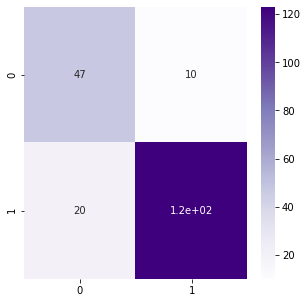

In [88]:
# Random Forest Classifier

from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)

model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'Purples')
plt.show()